In [74]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In [4]:
data = pd.read_csv("RESULTS_EUROVIS2015.csv")
data.head()

,fileName,indexFile,indexDR,classNum,scoreA,scoreM,scoreDes,DSC,CAL,HM,...,DC 20%,HDM 80,DC 2%,DUNN,DC 1%,DC 0.5%,CDM 1,DC 0.2%,DC 0.1%,AWTN
0,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,1,5,4,1,83.946488,168.392790,85.211464,...,56.800376,99.775785,93.433032,0.003952,98.920474,99.934515,88.151433,100.000000,100.0,330.792098
1,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,2,5,4,1,81.438127,202.032855,83.724674,...,54.498185,99.439462,92.019047,0.003344,98.654829,99.904137,81.307295,99.999407,100.0,327.474607
2,Entangled1-3d-3cl-separate_PCA_data.csv,1,1,3,5,4,1,83.612040,179.412919,85.662520,...,55.902111,99.663677,93.679104,0.003371,99.009648,99.932368,88.336925,99.999407,100.0,327.621398
3,Entangled1-3d-3cl-separate_RobPCA_data.csv,1,2,1,5,4,1,83.919598,181.354553,84.760740,...,57.095953,98.191443,93.611821,0.002583,99.128890,99.879285,82.383557,99.997036,100.0,324.705526
4,Entangled1-3d-3cl-separate_RobPCA_data.csv,1,2,2,5,4,1,81.407035,192.947084,83.722177,...,55.212948,98.654709,92.693371,0.002513,99.029505,99.894526,85.241735,99.997332,100.0,324.363518


In [5]:
data = data[:-1]

metrics_data = data.iloc[:,7:42]
metrics_data.head()

,DSC,CAL,HM,LDA,WII,SIL,GAM,ABW,CS,HDM 10,...,DC 20%,HDM 80,DC 2%,DUNN,DC 1%,DC 0.5%,CDM 1,DC 0.2%,DC 0.1%,AWTN
0,83.946488,168.392790,85.211464,0.233286,0.320842,0.244208,0.320500,1.307991,0.910946,79.906761,...,56.800376,99.775785,93.433032,0.003952,98.920474,99.934515,88.151433,100.000000,100.0,330.792098
1,81.438127,202.032855,83.724674,0.574045,0.305026,0.249141,0.339768,1.333924,0.774196,75.904697,...,54.498185,99.439462,92.019047,0.003344,98.654829,99.904137,81.307295,99.999407,100.0,327.474607
2,83.612040,179.412919,85.662520,0.915691,0.313059,0.249217,0.339577,1.331933,0.904530,81.196308,...,55.902111,99.663677,93.679104,0.003371,99.009648,99.932368,88.336925,99.999407,100.0,327.621398
3,83.919598,181.354553,84.760740,0.095612,0.312085,0.250118,0.334770,1.324574,0.801723,77.244476,...,57.095953,98.191443,93.611821,0.002583,99.128890,99.879285,82.383557,99.997036,100.0,324.705526
4,81.407035,192.947084,83.722177,0.704854,0.309980,0.246604,0.332735,1.324828,0.890831,75.415086,...,55.212948,98.654709,92.693371,0.002513,99.029505,99.894526,85.241735,99.997332,100.0,324.363518


In [6]:
train_X, test_X = train_test_split(metrics_data, test_size=0.2)
print(train_X.shape)
print(test_X.shape)

(662, 35)
(166, 35)


In [7]:
labels = data['scoreDes']
train_y, test_y = train_test_split(labels, test_size=0.2)
print(train_y.shape)
print(test_y.shape)

(662,)
(166,)


### Logistic Regression

In [8]:
reg = LogisticRegression().fit(train_X, train_y)
reg_predictions = reg.predict(test_X)
accuracy_score(reg_predictions, test_y)

0.5180722891566265

### Neural Network

In [9]:
network = Sequential()
network.add(Dense(units=35, activation='relu', input_shape=(35,)))
network.add(Dense(units=35, activation='relu'))
network.add(Dense(units=1, activation='sigmoid'))

In [10]:
network.compile(loss='binary_crossentropy', 
                optimizer='rmsprop', 
                metrics=['accuracy'])

In [11]:
history = network.fit(train_X,
                      train_y,
                      epochs=100,
                      verbose=1,
                      batch_size=100)

Epoch 1/100
662/662 [==============================] - 1s 2ms/step - loss: 8.0590 - acc: 0.5000
Epoch 2/100
662/662 [==============================] - 0s 35us/step - loss: 8.0590 - acc: 0.5000
Epoch 3/100
662/662 [==============================] - 0s 22us/step - loss: 8.0590 - acc: 0.5000
Epoch 4/100
662/662 [==============================] - 0s 27us/step - loss: 8.0590 - acc: 0.5000
Epoch 5/100
662/662 [==============================] - 0s 27us/step - loss: 8.0590 - acc: 0.5000
Epoch 6/100
662/662 [==============================] - 0s 21us/step - loss: 8.0590 - acc: 0.5000
Epoch 7/100
662/662 [==============================] - 0s 34us/step - loss: 8.0590 - acc: 0.5000
Epoch 8/100
662/662 [==============================] - 0s 33us/step - loss: 8.0590 - acc: 0.5000
Epoch 9/100
662/662 [==============================] - 0s 32us/step - loss: 8.0590 - acc: 0.5000
Epoch 10/100
662/662 [==============================] - 0s 38us/step - loss: 8.0590 - acc: 0.5000
Epoch 11/100
662/662 [========

662/662 [==============================] - 0s 38us/step - loss: 8.0590 - acc: 0.5000
Epoch 85/100
662/662 [==============================] - 0s 26us/step - loss: 8.0590 - acc: 0.5000
Epoch 86/100
662/662 [==============================] - 0s 34us/step - loss: 8.0590 - acc: 0.5000
Epoch 87/100
662/662 [==============================] - 0s 29us/step - loss: 8.0590 - acc: 0.5000
Epoch 88/100
662/662 [==============================] - 0s 26us/step - loss: 8.0590 - acc: 0.5000
Epoch 89/100
662/662 [==============================] - 0s 27us/step - loss: 8.0590 - acc: 0.5000
Epoch 90/100
662/662 [==============================] - 0s 19us/step - loss: 8.0590 - acc: 0.5000
Epoch 91/100
662/662 [==============================] - 0s 25us/step - loss: 8.0590 - acc: 0.5000
Epoch 92/100
662/662 [==============================] - 0s 22us/step - loss: 8.0590 - acc: 0.5000
Epoch 93/100
662/662 [==============================] - 0s 22us/step - loss: 8.0590 - acc: 0.5000
Epoch 94/100
662/662 [===========

In [12]:
nn_predictions = network.predict(test_X)
nn_predictions = (nn_predictions > 0.5)
accuracy_score(nn_predictions, test_y)

0.463855421686747

### Support Vector Regression

In [13]:
svr = SVR(gamma=0.001, C=1.0, epsilon=0.2)
svr.fit(train_X, train_y)
svr_predictions = svr.predict(test_X)
svr_predictions = (svr_predictions > 0.5)
accuracy_score(svr_predictions, test_y)

0.5120481927710844

### PCA

In [17]:
pca = PCA()
pca.fit(metrics_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
metrics_data.columns

Index(['DSC', 'CAL', 'HM', 'LDA', 'WII', 'SIL', 'GAM', 'ABW', 'CS', 'HDM 10',
       'ABTN', 'HDM 5', 'CDM 4', 'CDM 3', 'DC 10%', 'CDM 5', 'CDM 2', 'CDM 6',
       'CDM 7', 'DC 5%', 'CDM 8', 'CDM 10', 'CDM 9', 'HDM 20', 'HDM 40',
       'DC 20%', 'HDM 80', 'DC 2%', 'DUNN', 'DC 1%', 'DC 0.5%', 'CDM 1',
       'DC 0.2%', 'DC 0.1%', 'AWTN'],
      dtype='object')

Text(0.5,1,'PCA Scree Plot')

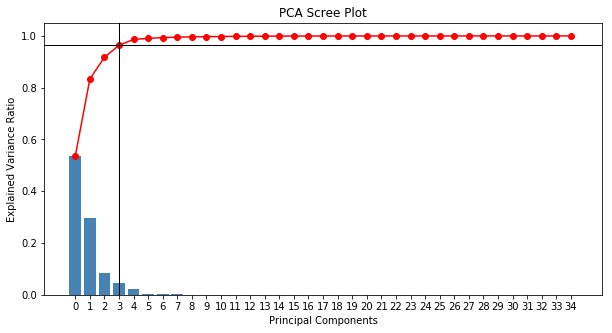

In [44]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(0,35), pca.explained_variance_ratio_, color='steelblue')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#FF0000', marker="o")
plt.xticks(np.arange(0,35))
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
# plt.plot([0, 0], [1, 1], color='#FF0000', linestyle='-', linewidth=2)
plt.axvline(3, linewidth=1, color='#000000')
plt.axhline(np.cumsum(pca.explained_variance_ratio_)[3], linewidth=1, color='#000000')

plt.title("PCA Scree Plot")

In [51]:
biplot_points = pca.transform(metrics_data)[:,:2]

Text(0,0.5,'PC 2')

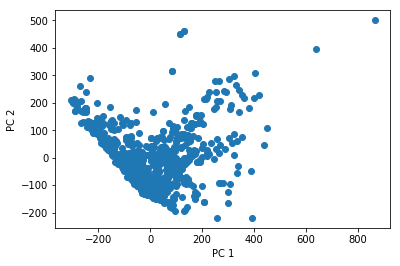

In [80]:
plt.scatter(biplot_points[:,0], biplot_points[:,1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")

### Calculating Loadings

In [55]:
squared_loadings = np.sqrt(np.add(np.square(pca.components_[0]), np.square(pca.components_[1])))
squared_loadings

array([7.28306326e-02, 9.44601052e-01, 3.70362278e-02, 5.98184746e-03,
       1.05966941e-03, 1.03211626e-03, 1.44939141e-03, 2.09253384e-03,
       2.42780935e-04, 5.56372933e-02, 8.29228212e-01, 5.84764468e-02,
       5.08533204e-02, 4.95604410e-02, 5.63630719e-02, 4.89035235e-02,
       4.85308200e-02, 4.78890861e-02, 4.65035437e-02, 4.29027316e-02,
       4.46413574e-02, 4.38917396e-02, 4.41995797e-02, 4.77768906e-02,
       3.03189091e-02, 4.96537477e-02, 1.50234283e-02, 1.77774880e-02,
       2.06246393e-04, 4.55158830e-03, 7.55379514e-04, 1.95096281e-02,
       6.60374386e-05, 1.58000624e-05, 6.12476489e-01])

In [59]:
loadings = pd.DataFrame(np.append(np.array(metrics_data.columns).reshape(35,1), squared_loadings.reshape(35,1), axis=1), columns=["Attribute names","Squared PCA loadings"])

In [70]:
loadings.sort_values(by="Squared PCA loadings", ascending=False).head(n=10)

,Attribute names,Squared PCA loadings
1,CAL,0.944601
10,ABTN,0.829228
34,AWTN,0.612476
0,DSC,0.0728306
11,HDM 5,0.0584764
14,DC 10%,0.0563631
9,HDM 10,0.0556373
12,CDM 4,0.0508533
25,DC 20%,0.0496537
13,CDM 3,0.0495604


In [71]:
metrics_data.columns

Index(['DSC', 'CAL', 'HM', 'LDA', 'WII', 'SIL', 'GAM', 'ABW', 'CS', 'HDM 10',
       'ABTN', 'HDM 5', 'CDM 4', 'CDM 3', 'DC 10%', 'CDM 5', 'CDM 2', 'CDM 6',
       'CDM 7', 'DC 5%', 'CDM 8', 'CDM 10', 'CDM 9', 'HDM 20', 'HDM 40',
       'DC 20%', 'HDM 80', 'DC 2%', 'DUNN', 'DC 1%', 'DC 0.5%', 'CDM 1',
       'DC 0.2%', 'DC 0.1%', 'AWTN'],
      dtype='object')

In [73]:
metrics_data.isna().sum()

DSC        0
CAL        0
HM         0
LDA        0
WII        0
SIL        0
GAM        0
ABW        0
CS         0
HDM 10     0
ABTN       0
HDM 5      0
CDM 4      0
CDM 3      0
DC 10%     0
CDM 5      0
CDM 2      0
CDM 6      0
CDM 7      0
DC 5%      0
CDM 8      0
CDM 10     0
CDM 9      0
HDM 20     0
HDM 40     0
DC 20%     0
HDM 80     0
DC 2%      0
DUNN       0
DC 1%      0
DC 0.5%    0
CDM 1      0
DC 0.2%    0
DC 0.1%    0
AWTN       0
dtype: int64

In [76]:
mds = MDS()
mds.fit(metrics_data)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

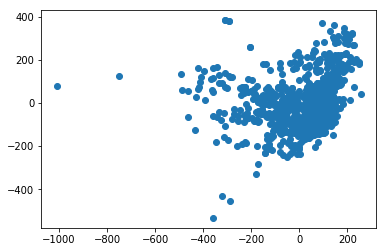

In [79]:
plt.figure(figsize=())
plt.scatter(mds.embedding_[:,0], mds.embedding_[:,1])